<a href="https://colab.research.google.com/github/nadhifahlutfiyah/PCVK_GENAP_2023/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS**


*   Nadhifah Lutfiyah Mahmudah / 2041720082
*   Rofiqoh Wahyuningtyas / 2041720082


In [9]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random
import math
from PIL import Image

In [10]:
def conv(img, kernel):
    kH,kW = kernel.shape
    (imH,imW) = img.shape
    new_img = np.zeros(img.shape)
    pad = int((kH-1)/2)
    
    for y in range(imH-kH):
        for x in range(imW-kW):
            window = img[y:y+kH,x:x+kW]
            new_img[y+pad,x+pad] = (kernel * window).sum()
    
    return new_img

In [11]:
def get_image():
    DATADIR = "/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Brown spot/"
    
    selected = False
    while(selected == False):
        rand = random.randrange(0,len(os.listdir(DATADIR)))
        img_name = (os.listdir(DATADIR))[rand]
        if img_name.endswith("jpg"):
            img = Image.open(os.path.join(DATADIR, (os.listdir(DATADIR))[rand])).convert('L')
            img_arr = np.asarray(img)
            selected = True

    return img_arr

In [12]:
def sobel_filter(img):
    sobelx = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

    sobely = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
    
    kH,kW = sobelx.shape
    (imH,imW) = img.shape
    new_img = np.zeros(img.shape)
    theta = np.zeros(img.shape)
    hsv_img = np.zeros((img.shape[0],img.shape[1],3))
    nms_img = np.zeros(img.shape)
    pad = int((kH-1)/2)
    
    for y in range(imH-kH):
        for x in range(imW-kW):
            window = img[y:y+kH,x:x+kW]
            new_img[y+pad,x+pad] = (((sobelx * window).sum())**2 + ((sobely * window).sum())**2)**0.5
            if(new_img[y+pad,x+pad] > 0):
                if((sobelx * window).sum() == 0):
                    theta[y+pad,x+pad] = 90
                else:
                    theta[y+pad,x+pad] = (math.degrees(math.atan((sobely * window).sum()/(sobelx * window).sum())))%180
                          
    for i in range(imH-1):
        for j in range(imW-1):
            if(theta[i,j] != 0):
                quad = theta[i,j]//22.5
                neighborA = 255
                neighborB = 255

                if quad in [0,8]:
                    neighborA = new_img[i,j-1] #Left
                    neighborB = new_img[i,j+1] #Right
                elif quad in [1,2]:
                    neighborA = new_img[i-1,j-1] #LowerLeft
                    neighborB = new_img[i+1,j+1] #UpperRight
                elif quad in [5,6]:
                    neighborA = new_img[i-1,j+1] #LowerRight
                    neighborB = new_img[i+1,j-1] #UpperLeft
                elif quad in [3,4]:
                    neighborA = new_img[i-1,j] #Down
                    neighborB = new_img[i+1,j] #Up
                if(max([neighborA,new_img[i,j],neighborB]) == new_img[i,j] and new_img[i,j] >= 255 * 0.4):
                    nms_img[i,j] = new_img[i,j]
                    hsv_img[i,j,:] = [theta[i,j],255,255]
          
    return new_img.astype(np.uint8),hsv_img.astype(np.uint8),nms_img.astype(np.uint8)

In [13]:
img = get_image()
img = cv2.GaussianBlur(img,(3,3),0)

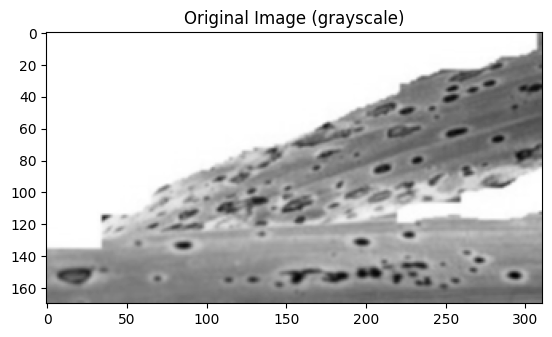

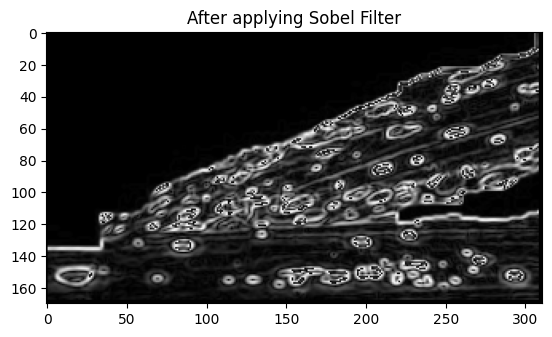

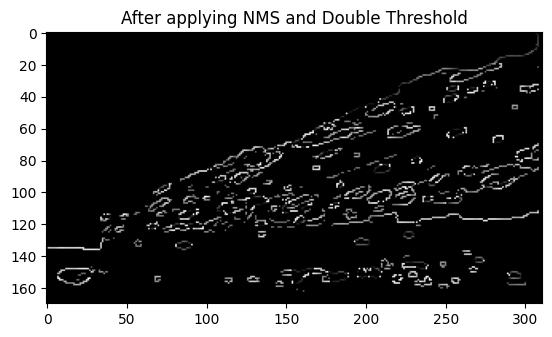

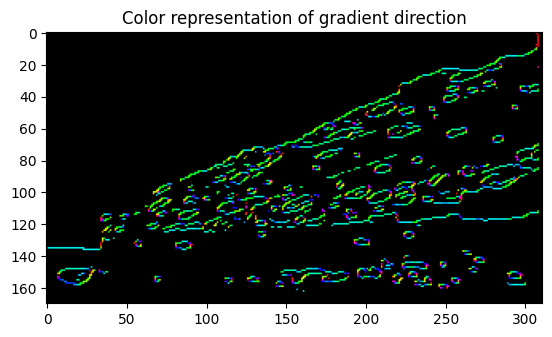

In [14]:
sobel_img,hsv_img,nms_img = sobel_filter(img)

plt.figure()
plt.title("Original Image (grayscale)")
plt.imshow(img,cmap='gray')
plt.figure()
plt.title("After applying Sobel Filter")
plt.imshow(sobel_img,cmap='gray')
plt.figure()
plt.title("After applying NMS and Double Threshold")
plt.imshow(nms_img,cmap='gray')
plt.figure()
plt.title("Color representation of gradient direction")
plt.imshow(cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB))

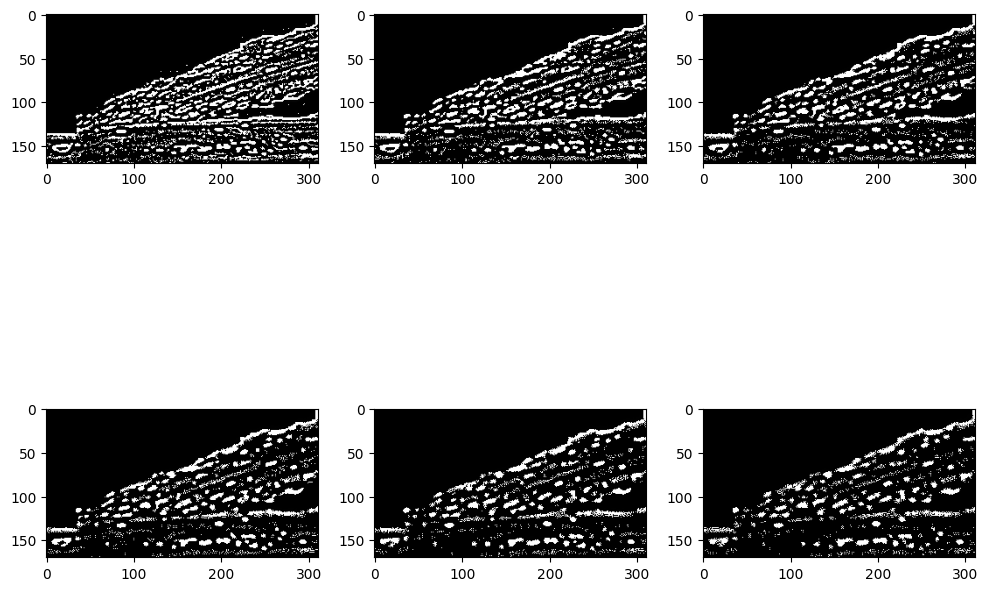

In [15]:
count = 0
blur = cv2.GaussianBlur(img,(3,3),0.5)
plt.figure(figsize=(10,10))
while(True):
    blur = cv2.GaussianBlur(blur,(3,3),0)
    new_blur = cv2.GaussianBlur(blur,(3,3),0)
    count+=1
    plt.subplot(2,3,count)
    plt.imshow((blur-new_blur),cmap="gray")
    if(count == 6):
        break
    blur = new_blur
plt.tight_layout()
plt.show()